Hecho en Python por:
Atzin López-Tercero y Kenny Angelberth Manjarrez-Gracia

# Introducción.
##  Espacio-tiempo de Schwarzschild:

En Enero de 1916, Karl Schwarzschild proporcionó como solución particular de las ecuaciones de campo de Einstein el espacio-tiempo de Schwarzschild. Al mes después, Einstein decía que:

*“No esperaba que nadie pudiera formular una solución exacta del problema de una manera tan simple.”*

Este modelo de espacio-tiempo es el modelo más simple de un universo con una única estrella que no rota, esto es, permanece estática y su campo gravitatorio es el mismo para todos los cuerpos que estén a la misma distancia con respecto a la estrella. Este modelo es aplicable en el Sistema Solar y es mucho más preciso que el modelo de Newton. Además, nos permite explicar algunos fenómenos como el avance del perihelio y la curvatura de la luz, entre otros.

Las principales propiedades de la solución de Schwarzschild son las siguientes:

1.**Universo estático**. Asumiremos que sea un universo estático, es decir, la métrica no depende del tiempo y obliga a que la estrella no rote sobre sí misma. Esto encaja con la idea de que la atracción gravitatoria depende únicamente de la posición y no del tiempo en este caso.

2.**Simetría esférica**. En otras palabras, dados un instante y una distancia radial $(t, r)$, la métrica es la misma independientemente de donde estemos en la $ \mathbb{S}^2$.

3.**Vacío**. Nuestro espacio-tiempo ha de ser vacío, pues la única fuente de gravedad es la estrella y no se incluye en el modelo. Consecuentemente, el tensor de Ricci es nulo, ya que si el tensor energía-momento, T, es nulo, entonces también lo es $G\mu \nu$.

4.**Minkowski en el infinito**. Cuando nos situemos muy lejos de la fuente de gravedad, su influencia será despreciable, es decir, la métrica de Schwarzschild se parece a la métrica de Minkowski cuando $r \rightarrow  \infty$. Esto se conoce como métrica asintóticamente plana.

Este modelo es válido para describir universos vacíos en el que hay una única fuente de gravedad estática puntual y que afecta de igual manera a los objetos que se encuentren a la misma distancia. Se consigue así un espacio-tiempo de 4 dimensiones con dos componentes conexas dotado de la métrica de Schwarzschid.

**Diagrama de Penrose-Carter para el E-T de Schwarzschild**

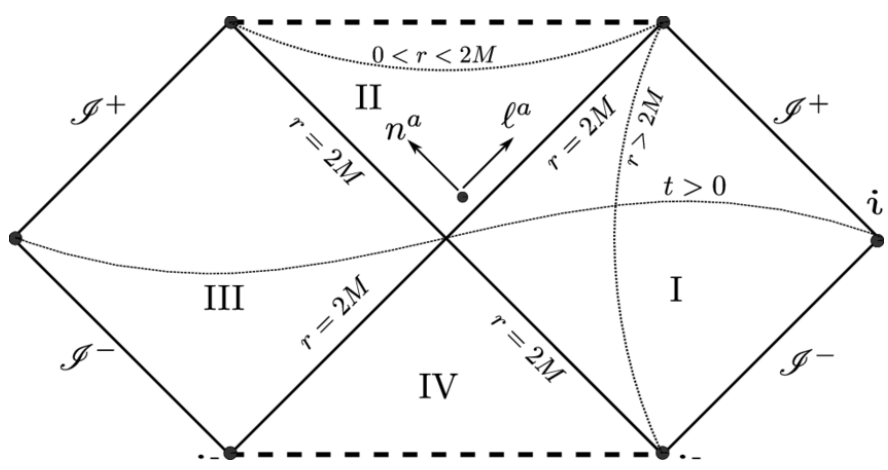

Del diagrama de Penrose-Carter para el E-T de Schwarzschild es un diagrama de la "geometría extendida del E-T", porque en el primer rombo (en la sección $I$), se representa a nuestro universo; en el triángulo invertido en la parte superior (en la sección $II$),se representa un agujero negro; en el triángulo invertido (sección $IV$), se representa a un agujero blanco; y el rombo a la izquierda (en la sección $II$), es un universo que está causalmente desconectado del nuestro, i.e., ninguna actividad o evento que se realice dentro de nuestro universo va a tener ingerencia en $III$.

¿Por qué es así? Para responder a esto tenemos que visualizar las flechas en $II$, señaladas como $n^a$ y $ \mathcal{l}^A$, que son las flecas para los eventos causales (las diagonales del cono de luz), eso nos dice que esas flechas van a ser seguidas por los elementos sin masa, como los fotones; y los vectores que tengan esa forma van a ser los elementos con masa. La diagonal que limita $I$ y $II$ es el horizonte de eventos del agujero negro, de esta forma, todo evento originado en el horizonte no afectará de forma causal a ningún  punto del E-T fuera de $II$. 

# Objetivo.

Determinaremos las órbitas de partículas con masa debido al potencial efectivo de un agujero negro en un espacio-tiempo tipo Schwarzschild. Para este propósito implementaremos el método numérico de Runge-Kutta de orden 4.

Entonces, para el análisis de estas diferentes órbitas, se tendrá en cuenta que son válidas para un objeto pequeño que orbita alrededor de un objeto grande (en este caso, un agujero negro) y sin ninguna fuerza externa. .

<p align="center">
  <img src="https://www.physicsoftheuniverse.com/images/relativity_curved_space.jpg"  width=35% />
</p>

#Desarrollo

Para nuestro propósito, vamos a implementar el algoritmo RK4 (ya visto en clase), recordando primero que es útil para resolver ecuaciones diferenciales del siguiente tipo:

$$
y'(x)=f(x,y)
$$

$$
y(x_o)=y_o
$$

El algoritmo tiene la siguiente forma:

$$
y_{j+1}=y_j+\dfrac{1}{6}\left(k_0+2k_1+2k_2+k_3\right)
$$

Donde $k_0$, $k_1$, $k_2$ y $k_3$ tienen la siguiente forma:

$$
k_0=hf(x_j,y_j)\\
k_1=hf\left(x_j+\frac{h}{2},y_j+\frac{k_0}{2}\right)\\
k_2=hf\left(x_j+\frac{h}{2},y_j+\frac{k_1}{2} \right)\\
k_3=hf\left(x_j+h,y_j+k_2\right)$$ 

Cuyo código generamos del siguiente modo:

In [ ]:
#importamos las librerías necesarias:
from pylab import *
from scipy.integrate import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

In [ ]:
def rk4(fs,x0,xf,n,yinits): #Nuestro método tiene como argumentos a la función, el punto inicial y el punto final,la cantidad de
    #puntos que yo tenga en la discretización de la variable independiente y yinits va a ser un arreglo que contenga los valores
    # iniciales de las ecuaciones diferenciales acopladas x0 y y0.
    h = (xf-x0)/(n-1) #h es el espaciado entre los puntos.
    xs = x0 + np.arange(n)*h #xs es el arreglo en el cual vamos a poner cada uno de los puntos del grid, es decir, es la
    #discretización de la variable independiente. Quiero empezar en x0 y que aumente de h en h.
    ys = np.zeros((n, yinits.size)) # creamos un arreglo bidimensional de ceros (que puede ser visto como matriz, con n filas 
    # y columnas determinados por el tamaño de yinits (que tiene dos elementos), en ellas se guardaran los puntos solucion 
    #de las dos curvas incognitas.
    yvals = np.copy(yinits) #hacemos una copia de yinits para no usar la misma variable
    for j,x in enumerate(xs): #usamos 'enumerate' para obtener tuplas de los valores con sus índices, es decir, creamos 
        #arreglo donde j es el índice y x el valor correspondiente (en xs). El tipo enumerate es un tipo auxiliar que ayuda a 
        #iterar una secuencia de elementos, obteniendo pares de elementos con la posición y el elemento.
        ys[j,:] = yvals #nos ubicamos en la fila j y tomamos todos los valores de las columnas, ahora tenemos vectores.
        #Se definen las cuatro aproximaciones de la pendiente
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6  #Se calcula el siguiente punto solucion en funcion del ultimo, y de las aproximaciones 
        #anteriores.
    return xs, ys

Para asegurarnos que el código funciona correctamente, lo probaremos en una ecuación diferencial cuya solución conocemos:
$$
\frac{dP}{dt} = aP(t){(1-\frac{P(t)}{P_c})}
$$


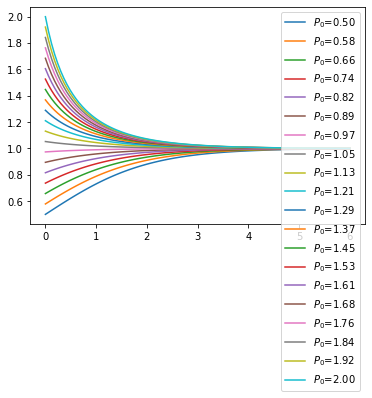

In [ ]:
  ## Definiendo a la EDO
def mod_log(t , p , a=1 , pc=1):
    return a*p*(1-(p/pc))

## Llamamos a la función Runge-Kutta 4 para la solución de la EDO
cond_ini = linspace(0.5,2,20)
for ini in cond_ini:
    sol = rk4(mod_log, 0, 6, 100 , ini)
    plot(sol[0],sol[1],label=r'$P_0$=%2.2f' %(ini))
legend()
plt.savefig("Prueba Runge Kutta.pdf",bbox_inches='tight')
show()

## Órbitas en el espacio-tiempo (E-T) de Schwarzschild



Para el caso que vamos a estudiar, analizaremos la solución para la región exterior de un objeto con simetría esférica tal que el E-T pueda ser considerado estático. De esta manera obtenemos la siguiente métrica del E-T, que es una solución exacta a las ecuaciones de campo de Einstein y corresponde al campo gravitacional externo de un cuerpo sin carga y sin rotación de masa $M$:

$$
ds^2=-\left( 1-\frac{2GM}{rc^2} \right) (c dt)^2+\left( 1-\frac{2GM}{rc^2} \right)^{-1}dr^2+r^2(d\theta^2+\sin^2(\theta)d\phi^2)
$$

donde $\tau$, en el caso de una partícula de prueba de masa positiva pequeña, es el tiempo propio (tiempo medido por un reloj que se mueve con la partícula) en segundos, $c$ es la velocidad de la luz en metros por segundo, $t$ es, para $r>a$, la coordenada de tiempo (tiempo medido por un reloj estacionario en el infinito) en segundos, $r$ es, para $r>a$, la coordenada radial (circunferencia de un círculo centrado en la estrella dividida por $2\pi$ ) en metros, $\theta$ es la colatitud (ángulo desde el norte) en radianes, $\varphi$ es la longitud en radianes, y $a$ es el radio de Schwarzschild del cuerpo masivo (en metros), que está relacionado con su masa $M$ por $a=\frac{2GM}{c^2}$, donde $G$ es la constante gravitacional.

Podemos reescribir la ecuación de la metrica de la forma:

$$
ds^2=-\left( 1-\frac{a}{r} \right) (cdt)^2+\frac{1}{1-\frac{a}{r}}dr^2+r^2d\phi^2, \hspace{2cm}...(1)
$$

con $a=\frac{2GM}{c^2}$, puesto que vamos a trabajar con el caso particular en el que $\theta=\pi/2$ (fijamos el plano ecuatorial).

Ahora vamos a considerar las siguientes condiciones que se cumplen para cualquier partícula que se mueva en este E-T:

$$
\frac{dt}{d\tau}=\frac{E}{c^2m(1-a/r)},
$$

$$
\frac{d\phi}{d\tau}=\frac{L}{mr^2},
$$

que por simplicidad vamos a usar de manera adimensional:

$$
\frac{dt}{d\tau}=\frac{E}{(1-1/r)} \hspace{2cm}...(2)
$$

$$
\frac{d\phi}{d\tau}=\frac{L}{r^2} \hspace{2cm}...(3)
$$

Notemos que estas ecuaciones representan las magnitudes constantes en esta métrica, que pueden obtenerse calculando los killings (que son vectores que nos permiten definir leyes de conservación y otras invariantes).

Haciendo álgebra con las ecuaciones (1), (2) y (3), vamos a optener la ecuación:

$$
E^2-1=\left(\frac{dr}{d\tau}\right) +\frac{L^2}{r^2}-\frac{1}{r}-\frac{L^2}{r^3}
$$

Hacemos $\epsilon=E^2-1$ y nos queda que:

$$
\epsilon=\left(\frac{dr}{d\tau}\right) +\frac{L^2}{r^2}-\frac{1}{r}-\frac{L^2}{r^3}
$$

Podemos observar de la ecuación obtenida que tenemos una energía con un elemento cinético y potencial de la forma

$$
V_{eff}(r)=\frac{L^2}{r^2}-\frac{1}{r}-\frac{L^2}{r^3}. \hspace{2cm}...(4)
$$

Es necesario trabajar con este potencial para estudiar qué tipo de gráfica nos hace puesto que una vez controlada la forma de este potencial, podemos saber el tipo de órbitas que va a haber en el E-T, con este propósito, calculamos los máximos, los mínimos y los puntos de inflexión, entonces encontramos la primer derivada, dividimos por $r^4$ e igualamos a cero:

$$
V_{eff}'(r)=-2L^2r+r^2+3L^2=0 \hspace{0.5cm} \rightarrow r_1=L^2+L\sqrt{L^2-3} \hspace{0.5cm}  \text{y} \hspace{0.5cm} r_2=L^2-L\sqrt{L^2-3}
$$

Sacando la segunda derivada y sustituyendo, tenemos que $r_1>0$ (es un mínimo) y $r_2<0$ (es un máximo), por lo que tenemos la condición de que $L\geq 3$ para que existan puntos críticos, o bien, que $L^2\ge\frac{3r_s^2}{c^2}$ trabajando con unidades, donde $a=\frac{2MG}{c^2}$ , entonces 

$$
L^2\ge\frac{12M^2G^2}{c^6}.
$$

Vamos a trabajar con una distancia medida con unidades astronómicas, una masa medida mediante masas solares y un tiempo medido en años con fines prácticos. Ahora, sabemos que: 

$$
G= 4\pi^2\,\,AU^3 M_{\odot}^{-1}yr^{-2}\quad\quad \& \quad\quad c\approx 63197.8\,\,AU yr^{-1}
$$

Como $L^2\ge\frac{12M^2G^2}{c^6}$, vamos a fijar

$$
L^2=\frac{24M^2G^2}{c^6}.
$$

Además, vamos a definir $M=10^{6} M_{\odot}$, puesto que es un valor usual en el estudio de agujeros negros. Ya con estos valores, $L^2=5.871092923045804\times 10^{-13} yr^2$. El potencial efectivo y los puntos críticos son:

$$
V_{eff}(r)=-\frac{0.0000463563}{r} + \frac{0.00234489}{r^2} - \frac{0.0197691}{r^3}
$$

$$
r_2 \approx 0.03474132510043436\,\,AU,\quad r_1 \approx 0.20248728156499723\,\,AU
$$

Además,

$$
a=0.01976905055545263\,\,AU
$$

Como $r_2$ corresponde al mínimo en el potencial, mientras que $r_1$, al máximo. El potencial evaluado en éstos puntos será:

$$
V_{eff}^{min}=U_{eff}(r_2)=-0.04602372915256611
$$

$$
V_{eff}^{max}=U_{eff}(r_1)=0.2682459513747886
$$

Para entender su forma vamos a graficar:

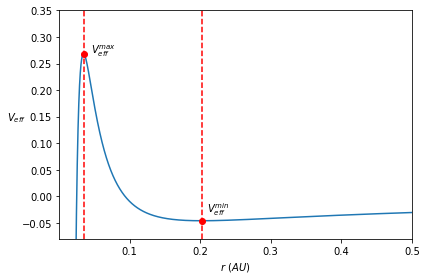

In [ ]:
#fijamos los valores obtenidos
rs=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-rs/r + (L2*(c**2))/r**2 - (L2*(c**2)*rs)/r**3)
ax.axvline(x=rmin,color='r', linestyle='--')
ax.axvline(x=rmax,color='r', linestyle='--')

ax.plot(rmax,Vmin,'ro')
ax.text(0.21,-0.03,'$V_{eff}^{min}$')

ax.plot(rmin,Vmax,'ro')
ax.text(0.045,0.27,'$V_{eff}^{max}$')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)
ax.set_ylabel('$V_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU)$')
plt.tight_layout()
plt.savefig('Veff vs r.pdf',bbox_inches='tight') 
show()

#from google.colab import files
#plt.savefig('name.pdf',bbox_inches='tight') 
#files.download("name.pdf")

Dada una curva (de potencial efectivo), el nivel de energía total por unidad de masa, $E/m$, determina la órbita, así que obtendremos la órbita descrita para una partícula en cada nivel de energía. Cada tipo de órbita que obtendremos está relacionada con una región de energía específica.

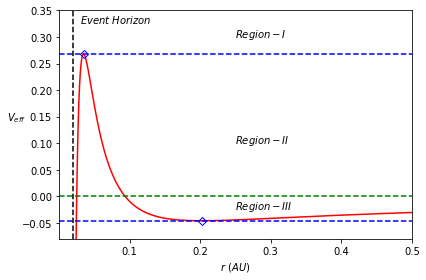

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-a/r + (L2*(c**2))/r**2 - (L2*(c**2)*a)/r**3,'r')

ax.axhline(y=Vmin,color='blue',linestyle='--')
ax.axhline(y=0,color='green',linestyle='--')
ax.axhline(y=Vmax,color='blue',linestyle='--')
ax.axvline(x=rs,color='k', linestyle='--')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)

ax.plot(rmax,Vmin,'bD',fillstyle='none')
ax.plot(rmin,Vmax,'bD',fillstyle='none')

ax.text(rs+0.01,0.325,'$Event\,\,Horizon$')
ax.text(.25,0.3,'$Region-I$')
ax.text(.25,0.1,'$Region-II$')
ax.text(.25,-0.025,'$Region-III$')

ax.set_ylabel('$V_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU$)')
plt.tight_layout()
plt.savefig('Regiones.pdf',bbox_inches='tight') 
show()


Las intersecciones de la línea de energía con la curva del potencial son los puntos de inflexión donde la componente radial del movimiento cambia de dirección. La línea de la región $III$ se cruza con la curva $V(r)$ solo en un punto, que es un mínimo local: esta es una órbita circular estable. La línea en la región $I$ corta a $V (r)$ también en un punto, que es, sin embargo, el máximo: la órbita circular correspondiente será inestable.La linea en la región $II$ corresponde auna órbita elíptica.

Vamos a tomar diferentes valores de energía para ver cómo sus las órbitas para cada una más adelante:

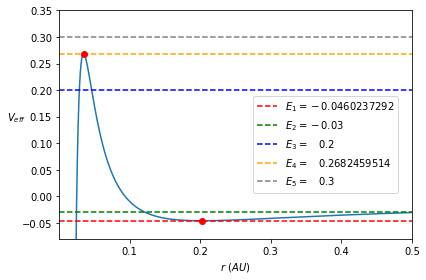

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-a/r + (L2*(c**2))/r**2 - (L2*(c**2)*a)/r**3)

ax.axhline(y=Vmin,color='r',linestyle='--',label='$E_1=-0.0460237292$')
ax.axhline(y=-0.03,color='g',linestyle='--',label='$E_2=-0.03$')
ax.axhline(y=0.2,color='b',linestyle='--',label='$E_3=\quad 0.2$')
ax.axhline(y=Vmax,color='orange',linestyle='--',label='$E_4=\quad 0.2682459514$')
ax.axhline(y=0.3,color='gray',linestyle='--',label='$E_5=\quad0.3$')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)
ax.set_ylabel('$V_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU)$')

ax.plot(rmax,Vmin,'ro')
ax.plot(rmin,Vmax,'ro')

ax.legend(loc="lower center", bbox_to_anchor=(0.755, 0.18), ncol= 1)
plt.tight_layout()
plt.savefig('Energías.pdf',bbox_inches='tight') 
show()



## Solución de la ecuación de la órbita aplicando Runge-Kutta 4

Para obtener una forma de la ecuación diferencial a la que le podamos aplicar el método RK4, usamos regla de la cadena, entonces $\frac{dr}{d\tau}=\frac{dr}{d\phi}\frac{d\phi}{d\tau}=\frac{dr}{d\phi}\frac{L}{r^2}$ y definimos $u=\frac{1}{r}$, de donde $\frac{du}{dr}=-r^2$ y sustituimos en la ecuación (*):

$$
\epsilon=L^2\left(\frac{du}{d\phi}\right)^2+L^2u^2-u-L^3u^3 \hspace{2cm}...(5)
$$

vamos a derivar la ecuación (5) respecto a $\phi$, de donde obtenemos:

$$
\left( 2L^2\frac{d^2u}{d\phi^2}+2uL^2-1-3L^2u^2\right)\frac{du}{d\phi}=0
$$

de donde podemos suponer que $\left( 2L^2\frac{d^2u}{d\phi^2}+2uL^2-1-3L^2u^2\right)=0$; despejando a $\frac{d^2u}{d\phi^2}$ y pasando a unidades internacionales nos queda una ecuación de la forma:

$$
\frac{d^2u}{d\phi^2}+u=\frac{1}{2}\frac{m^2ac^2}{L^2}+\frac{3au^2}{2}.
$$

Así, ya tenemos una ecuación diferencial de la forma

$$
u''(\phi)=\frac{3a}{2}u^2(\phi)-u(\phi)+\frac{1}{\lambda},
$$

donde:
$$
u(\phi)=\frac{1}{r(\phi)} \quad\quad , \quad\quad u'(\phi)=-u^2(\phi)r'(\phi) \quad\quad\& \quad\quad \lambda=\frac{2c^2L^2}{r}=0.2372286066654316.
$$

Para obtener las órbitas, vamos a aplicar el método _RK4_, por lo que necesitamos aplicar el siguiente cambio de variables:

$$
y_o(\phi)=u(\phi),
$$

$$
y_1(\phi)=u'(\phi),
$$

de esta forma, obtenemos el siguiente sistema de dos ecuaciones diferenciales acopladas:

$$
y_1'(\phi)=\frac{3r}{2}y_0^2(\phi)-y_0(\phi)+\frac{1}{\lambda},
$$

$$
y_0'(\phi)=y_1(\phi).
$$

Solo requerimos de las siguientes condiciones iniciales para aplicar _RK4_:

$$
y_0(\phi_0)=u(\phi_0)=u_0 \quad\quad,\quad y_1(\phi_0)=u'(\phi_0)=u'_0.
$$

Recordemos que:

$$
u(\phi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\phi_0)=u'_0=-\frac{r'_0}{r^2_0},
$$

como no sabemos cómo cambia $r$ respecto de $\phi$, y tampoco sabemos cuál es el valor inicial de la rerivada de $r$ respecto de $\phi$, sí podemos conocer el valor inicial de la velocidad, por lo que expresamos todo en términos de la velocidad inicial, para lo que vamos a usar uno de los vectores killing $\partial_{\phi}$, del cual se obtiene que:

$$
\dot{r}(\phi)=r'(\varphi)\dot{\phi}=r'(\phi)\frac{Lc^2}{r^2} \rightarrow r'=\frac{\dot{r}r^2}{Lc^2}.
$$

Por tanto:

$$
u(\phi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\phi_0)=u'_0=-\frac{\dot{r}_0}{Lc^2}.
$$

Implementamos el método empezando por definir una función:

In [ ]:
lam=0.2372286066654316
a=0.01976905055545263

def fs(x,yvals):
    y0,y1=yvals
    f0=y1
    f1=(3*a/2)*y0**2-y0+1/lam
    return np.array([f0, f1])

#Resultados: Gráficos de las órbitas en cada nivel de energía.

##$E = E_1$:
Este nivel de energía es el que se encuentra en el punto mínimo del potencial, por lo que tenemos que $E=V_{eff}^{min}=-0.04602372915256611$, así el objeto se encuentra en el punto mínimo y su velocidad inicial es cero, con lo que tenemos las condiciones iniciales:

$$
r_0=r_1=0.20248728156499723 \quad \text{y} \quad \dot{r}_0=0
$$

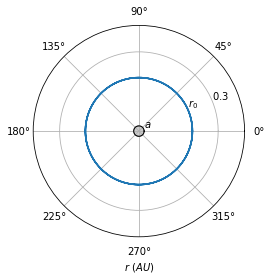

In [ ]:
#introducimos todas las constantes que vamos a utilizar para graficar
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=rmax
r_dot0=0
L=np.sqrt(L2)

# Definimos las condiciones iniciales para RK4
u0=1/r0
u_prime0=-r_dot0/(L*c**2)

#Aplicamos el método RK4 para obtener los arreglos deseados
x0, xf, n=0, 6*np.pi, 1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)
#aquí recuperamos la información de r puesto que el método nos va a dar a u, para esto tomamos la inversa de u
y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
    
#Realizamos nuestra gráfica que va a ser de tipo polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.4) #radio máximo
ax.set_xlabel('$r\,\,(AU$)') #etiquetas

circle = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)#círculo situado en el centro que representa al agujero negro
ax.add_artist(circle)


ax.grid(True) #para que se vean los grids
ax.set_rticks([a,r0,0.3]) #puntos que queremos que aparezcan 
ax.set_rlabel_position(22.5)
rtick_labels = ['$a$','$r_0$','$0.3$']#nombre de los puntos que queremos que se vean
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_0$') 
j=rtick_labels.index('$a$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()
plt.savefig('E_1.pdf',bbox_inches='tight') 
show()

#########################

Esta es la trayectoria que seguiría un objetos con las condiciones iniciales que impusimos, una trayectoria circulat. Dentro, colocamos al agujero negro con radio $a$, que es el horizonte. Podemos observar en la gráfica, que la partícula gira alrededor del eje vertical (el centro del agujero negro) con un momento angular dado ($L/m$, por unidad de masa); por tanto, el movimiento es un movimiento compuesto de esta rotación y el movimiento a lo largo de la dirección radial. Dada una curva (de potencial efectivo), el nivel de energía total por unidad de masa, $E/m$, determina la órbita. En este caso, las órbitas circulares en $r_1$ son estables, dado que representan un mínimo de potencial: si el cuerpo se acerca más a la estrella la rotación lo repele y si se aleja tal vez se escape, aunque puede que vuelva a caer.

##$E = E_2$
Este nivel de energía se encuentra dentro de la región $III$, En este caso tenemos que  $E=E_2=-0.03$, para este valor tenemos 3 puntos de intersección con la curva de potencial efectivo, que se obtienen de la igualdad $V_{eff}=E_2$:

$$
r_1=0.02473253017278028\,\,AU
$$

$$
r_2=0.12195911908713783\,\,AU
$$

$$
r_3=0.512276702588503\,\,AU
$$

Para el caso que queremos estudiar, al ser un objeto clásico no existe efecto túnel, por lo que no nos sirve $r1$, puesto que viene desde $r_3$ se va a encontrar confinado dentro de una región del potencial, así que vamos a considerar que la particula analizada se encuentra en la órbita ligada debido al potencial entre los puntos $r_2$ y $r_3$. Esto nos permite establecer los siguientes valores iniciales para nuestro gráfico a escala:

$$
r_0=r_3\quad \& \quad \dot{r}_0=0
$$

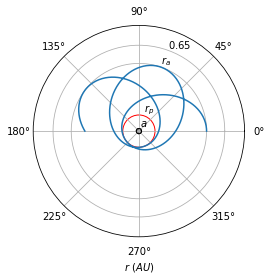

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=0.512276702588503  #Aphelion
r2=0.12195911908713783  #Perihelion
r_dot0=0
L=np.sqrt(L2)

#condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)


#Datos obtenidos de rk4
x0,xf,n=0*np.pi,5*np.pi,1000
yinits = np.array([u0,u_prime0])  
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.8)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k")
ax.add_artist(circle1)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='white',fill=False,ec="r")
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([a,r2,r0,0.65])
ax.set_rlabel_position(70.5)
rtick_labels = ['$a$','$r_p$','$r_a$','$0.65$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_p$') 
j=rtick_labels.index('$a$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()
plt.savefig('E_2.pdf',bbox_inches='tight') 
show()


#########################

Podemos ver cómo va a ser la órbita de un objeto situado con un nivel de energía $E_2$, que se encuentra en la región $III$, esta representa una partícula de prueba de energía $E_2$, que cruza la función $V(r)$ correspondiente a dicha partícula de prueba con momento angular $L$ en dos puntos $r_1$ y $r_2$. La componente radial del movimiento se verá entonces como si colocáramos una pequeña bola a la altura $E_2$ (es decir, en el punto $r_1$ o $r_2$ ) en la curva adecuada modelada verticalmente$ V (r )$ y dejar que ruede libremente; la bola rodaría periódicamente entre los puntos $r_1$ y $r_2$, y sus coordenadas  oscilarían entre los valores $r = r_1$ y $r =r_2$ . Por lo tanto, las partículas de prueba giran a lo largo de una órbita aproximadamente elíptica "perihelia" $r = r_1$ y "aphelia" $r =r_2$.

En la "gravedad newtoniana", todas las órbitas unidas son elipses (la órbita circular es en realidad un caso especial de una órbita elíptica). La clave de esto es que estas órbitas elípticas son perfectamente elípticas.

En relatividad general, por otro lado, las órbitas elípticas no existen. Órbitas perfectamente elípticas, al menos. Esto se debe a que las órbitas elípticas en la relatividad general exhiben un comportamiento conocido como precesión del perihelio.

Estas que vemos se llaman órbitas de "grandes torbellinos" y son complicadas en el sentido de que en realidad no tienen una "forma" general simple como las órbitas elípticas y circulares. De hecho, estas órbitas requieren un sistema de clasificación completo para describirlas completamente. Pero antes que nada, ¿por qué se les llama órbitas de zoom-torbellino? Esencialmente, este nombre proviene del hecho de que estas órbitas pueden tener tanto "pequeños bucles" (remolinos) como "grandes bucles" (zooms) alrededor del agujero negro.

ESto crea algunos patrones orbitales extremadamente únicos pero también complicados. Afortunadamente, hay una forma clara de clasificar estas órbitas y su forma general. Este sistema de clasificación se conoce como la tabla periódica de las órbitas de los agujeros negros.

De lo que voy a hablar a continuación que nos ayudará a comprender estas órbitas complicadas se basa en gran medida en un artículo llamado A Periodic Table for Black Hole Orbits (doi:10.1103/physrevd.77.103005), que presenta este sistema de clasificación de las órbitas de los agujeros negros.

En este sistema, cada órbita se caracteriza por tres números (z,w,v). Estos representan zooms, giros y vértices o, más exactamente, secuencia de vértices.

Bien, ¿qué significan exactamente estos números? He aquí un pequeño resumen de cómo funciona este sistema de clasificación:

* El entero z representa el número de zooms u "hojas" en la órbita; este es el número de "bucles grandes" que traza la partícula en órbita antes de regresar a su posición inicial en el apastron (distancia más grande desde el agujero negro).
* El número entero w representa el número de giros en la órbita; este es el número de "pequeños bucles" que la partícula en órbita traza alrededor del agujero negro antes de regresar al apastron.
*  El entero v representa la secuencia de vértices en la órbita; esto describe el orden en que la partícula en órbita se mueve de un vértice (= zoom u hoja) a otro. En particular, v da el siguiente vértice al que se moverá la partícula desde su vértice inicial.


_Ya que esta gráfica nos pareció interesante la animaremos:_

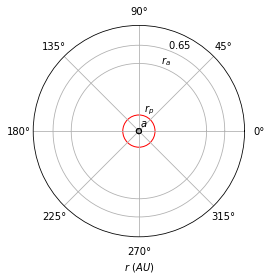

<Figure size 432x288 with 0 Axes>

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=0.512276702588503  #Aphelion
r2=0.12195911908713783  #Perihelion
r_dot0=0
L=np.sqrt(L2)

#Condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)



x0,xf,n=0*np.pi,5*np.pi,1000
yinits = np.array([u0,u_prime0])  
xs, ys = rk4(fs,x0,xf,n,yinits)


y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
def anima(i):
  ax.clear()
  ax.plot(xs[:i],y_s[:i])
  ax.set_rmax(0.8)
  ax.set_xlabel('$r\,\,(AU$)')
  circle1 = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k")
  ax.add_artist(circle1)
  circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='white',fill=False,ec="r")
  ax.add_artist(circle2)
  ax.grid(True)
  ax.set_rticks([a,r2,r0,0.65])
  ax.set_rlabel_position(70.5)
  rtick_labels = ['$a$','$r_p$','$r_a$','$0.65$']
  ax.set_yticklabels(rtick_labels)
  i=rtick_labels.index('$r_p$') 
  j=rtick_labels.index('$a$') 
  rgrid=ax.yaxis.get_gridlines()
  rgrid[i].set_linewidth(0)
  rgrid[j].set_linewidth(1)
  rgrid[j].set_color('k')
  plt.tight_layout()



animation = FuncAnimation(fig, anima, frames=len(xs),interval=10)
plt.show()

animation.save('Gráfica_E2.mp4')



##$E = E_3$

En este caso, el objeto se encuentra en la región $II$, ya que no se encuentra confinado y viene desde el infinito, tenemos $E=E_3=0.2$, para ese valor, considerando que $r>0$, vamos a tener 2 puntos de intersección con el potencial, los que se obtienen de la ecuación $V_{eff}=E_3$:

$$
r_1=0.028797478424216053\,\,AU
$$

$$
r_2=0.04627785649134387\,\,AU
$$

Para este caso, vamos a considerar que la partícula viene del infinito $r\rightarrow \infty$, entonces el potencial efectivo es:

$$
\lim_{r\rightarrow \infty}V_{eff}=0
$$

Así, vamos a tener que la energía va a ser completamente cinética:

$$
E=\frac{\dot{r}^2}{c^2}+V_{eff}\approx \frac{\dot{r}^2}{c^2}
$$

Entonces, los valores iniciales son:

$$
r_0\rightarrow \infty \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

Por propósitos numéricos hacemos:

$$
r_0=10^{20}\,\,AU \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

Donde:

$$
E=0.2
$$

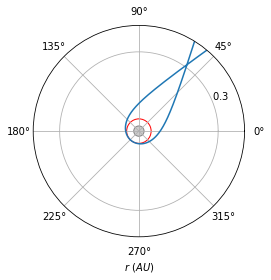

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r2=0.04627785649134387
r_dot0=np.sqrt(0.2)*c
L=np.sqrt(L2)


#Condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)


x0,xf,n=3.5*np.pi,7*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]

  
fig,ax= plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.4)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='gray',fill=False,ec="r")
ax.add_artist(circle1)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([.3])
ax.set_rlabel_position(22.5)
rtick_labels = ['$0.3$']
ax.set_yticklabels(rtick_labels)
plt.tight_layout()
plt.savefig('E_3.pdf',bbox_inches='tight') 
show()


#########################

Haciendo un zoom a la gráfica:

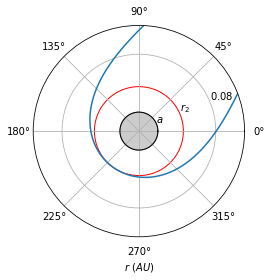

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r2=0.04627785649134387
r_dot0=np.sqrt(0.2)*c
L=np.sqrt(L2)


#Condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)


x0,xf,n=3.5*np.pi,7*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]

  
fig,ax= plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.11)
ax.set_xlabel('$r\,\,(AU)$')

circle1 = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='gray',fill=False,ec="r")
ax.add_artist(circle1)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([a,r2,.08])
ax.set_rlabel_position(22.5)
rtick_labels = ['$a$','$r_2$','$0.08$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_2$') 
j=rtick_labels.index('$a$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()
plt.savefig('E_3_zoom.pdf',bbox_inches='tight') 
show()


#########################

En primer lugar, ¿qué sucede en el caso de que una partícula en órbita tenga demasiada energía (una velocidad orbital demasiado alta)? Si este es el caso, ocurre más o menos lo mismo que ocurriría en la gravedad newtoniana; la partícula toma una órbita parabólica.

Estas órbitas se denominan parabólicas porque tienen una forma similar a una parábola (es posible que no siempre sean exactamente curvas parabólicas, pero un término general comúnmente utilizado para estas órbitas no unidas que escapan de la gravedad del agujero negro es "órbita parabólica").

Las órbitas parabólicas son órbitas no unidas, lo que simplemente significa que la partícula no permanecerá en órbita alrededor del agujero negro, sino que simplemente entrará en algún lugar cercano al agujero negro, se desviará de alguna manera y luego saldrá volando.

# $E = E_4$
esta energía pertenece al punto máximo del potencial, en el límite de la región $I$, en este caso tenemos $E=E_4=0.2682459513747886$, con los valores iniciales_

$$
r_0=r_2=0.03474132510043436\,\, AU\quad \& \quad \dot{r}_0=0
$$

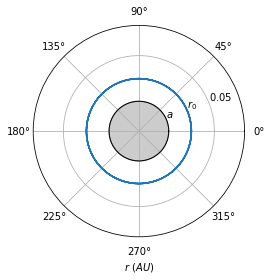

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
vmin=-0.04602372915256611
vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=rmin
r_dot0=0
L=np.sqrt(L2)

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(L*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ########## 
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.07)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([a,r0,.05])
ax.set_rlabel_position(22.5)
rtick_labels = ['$a$', '$r_0$','$0.05$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_0$') 
j=rtick_labels.index('$a$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()
plt.savefig('E_4.pdf',bbox_inches='tight') 
show()


#########################

Podemos observar, que al igual que pasó en $E_1$, tenemos una órbita circular pero más cercana al agujero negro, debido a que este punto máximo es inestable que al sufrir alguna perturbación podría fácilmente caer en el agujero negro.

##$E_1$ y $E_4$:

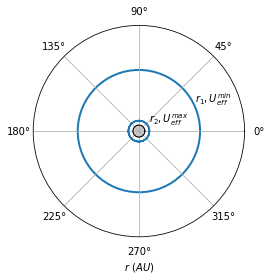

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=rmin
r_dot0=0
L=np.sqrt(L2)

##### To give the precise color to the circumference ####
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


#Condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)


x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]


########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.35)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle1)
circle2 = plt.Circle((0,0), rmax, transform=ax.transData._b, fc='gray',fill=False,ec=cycle[0],lw=2)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([a,rmin,rmax])
ax.set_rlabel_position(22.5)
rtick_labels = ['','$r_2, U_{eff}^{max}$', '$r_1, U_{eff}^{min}$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_1, U_{eff}^{min}$') 
j=rtick_labels.index('$r_2, U_{eff}^{max}$') 
k=rtick_labels.index('') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[k].set_linewidth(1)
rgrid[k].set_color('k')
plt.tight_layout()
plt.savefig('E_4 vs E_1.pdf',bbox_inches='tight') 
show()


#$E = E_5$
Se encuentra en la regíon superior $I$, $E=0.3$, for that value, donde el objeto viene del infinito, por lo que consideramos que $r>0$, además de que no tenemos puntos de intersección con el potencial.

Como viene del infinito, $r\rightarrow \infty$, por lo que:

$$
\lim_{r\rightarrow \infty}V_{eff}=0
$$

Nos queda una energía completamente cinética:

$$
E=\frac{\dot{r}^2}{c^2}+V_{eff}\approx \frac{\dot{r}^2}{c^2}
$$

Por lo tanto, los valores iniciales son:

$$
r_0\rightarrow \infty \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

For numerical purposes we have:

$$
r_0=10^{20}\,\,AU \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

Where:

$$
E=0.3
$$

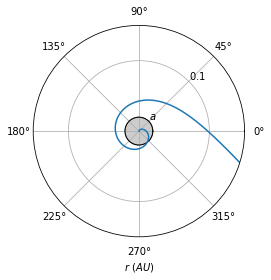

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r_dot0=np.sqrt(0.3)*c
L=np.sqrt(L2)


#Condiciones iniciales
u0=1/r0
u_prime0=-r_dot0/(L*c**2)



x0,xf,n=3*np.pi,6.5*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.15)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([a,.1])
ax.set_rlabel_position(45)
rtick_labels = ['$a$','$0.1$']
ax.set_yticklabels(rtick_labels)
j=rtick_labels.index('$a$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()
plt.savefig('E_5.pdf',bbox_inches='tight') 
show()


Otro tipo de órbita, que en realidad es completamente exclusivo de la relatividad general, es la trayectoria de caída en espiral.

Estos ocurren cuando la partícula en órbita no tiene suficiente momento angular para permanecer en órbita, lo que hace que la partícula entre en "espiral" en el agujero negro. El valor mínimo del momento angular.

Esto puede pasar de dos maneras; la primera forma es que una partícula entra desde algún lugar lejano con un momento angular menor que el valor mínimo y, por lo tanto, cae en espiral hacia el agujero negro.

La segunda forma es por pérdida de momento angular en una órbita limitada ya existente.

Por ejemplo, una partícula podría chocar con otras partículas, perdiendo algo de momento angular en el proceso; si la partícula pierde demasiado de su momento angular, de modo que ahora tiene menos del valor mínimo requerido, caerá en el agujero negro.

Nuevamente, también es posible que una partícula realice múltiples ciclos alrededor del agujero negro antes de entrar en espiral. Esto sucede si el momento angular está muy cerca de Lmin, pero solo un poco menos.

_Realizando la animación de la gráfica:_

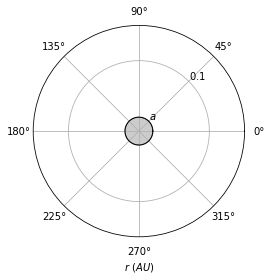

<Figure size 432x288 with 0 Axes>

In [ ]:
a=0.01976905055545263
rmin=0.03474132510043436
rmax=0.20248728156499723
Vmin=-0.04602372915256611
Vmax=0.2682459513747886
L2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r_dot0=np.sqrt(0.3)*c
L=np.sqrt(L2)



u0=1/r0
u_prime0=-r_dot0/(L*c**2)


x0,xf,n=3*np.pi,6.5*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

def animacion(i):
  ax.clear()
  ax.plot(xs[:i],y_s[:i])
  ax.set_ylim(0,0.15)
  ax.set_xlabel('$r\,\,(AU$)')
  circle = plt.Circle((0,0), a, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
  ax.add_artist(circle)
  ax.grid(True)
  ax.set_rticks([a,.1])
  ax.set_rlabel_position(45)
  rtick_labels = ['$a$','$0.1$']
  ax.set_yticklabels(rtick_labels)
  j=rtick_labels.index('$a$') 
  rgrid=ax.yaxis.get_gridlines()
  rgrid[j].set_linewidth(1)
  rgrid[j].set_color('k')
  plt.tight_layout()

animation2 = FuncAnimation(fig, animacion, frames=len(xs),interval=10)
plt.show()
animation2.save('Gráfica_E5.mp4')

#Conclusiones

En primera instancia una partícula masiva que tenga una energía superior al pozo viene de un punto lejano, se acerca al centro del potencial hasta una distancia determinada por el efecto de la fuerza centrífuga debido al momento angular, rebota en una especie de barrera de potencial y como no tiene cota superior se dirige al infinito. Si la partícula tiene una energía que
la confina dentro del pozo de potencial, tendrá una cota inferior y superior, lo que indica que va a fluctuar su trayectoria.
Dependiendo de su momento angular, tendrá cotas inferiores más lejanas del centro de potencial y en general una distancia máxima a la que llega la partícula que varía en función de las condiciones de energía iniciales. Si la partícula tiene una energía que la ubica exactamente en el mínimo del potencial, esta tendrá una trayectoria circular estable.  Se observan situaciones características de las órbitas que varían según el momento angular; el radio de la órbita circular es más grande a medida que el momento angular crece, la cota inferior y superior crecen, es decir, cada vez están más alejadas del centro del potencial, y el círculo central también crece. 


Es posible orbitar un agujero negro. Sin embargo, estas órbitas pueden ser extremadamente complicadas y solo pueden ocurrir a distancias mayores que la órbita circular más interna (IBCO) (nosotros llamamos a esta distancia como $a$). A distancias menores que el IBCO, cualquier cuerpo en órbita inevitablemente entrará en espiral en el agujero negro debido a que la gravedad es demasiado fuerte.

La relatividad general explica las órbitas como caminos a través del espacio-tiempo a lo largo de los cuales no hay fuerzas externas. Estas se llaman geodésicas. Cualquier objeto que se mueva a lo largo de una geodésica seguirá la curvatura del espacio-tiempo, lo que dará como resultado una fuerza gravitacional aparente que luego permitirá que el objeto experimente un movimiento orbital.

La idea de la curvatura del espacio-tiempo a veces se malinterpreta un poco.

El problema con esto proviene del hecho de que no es algo que podamos imaginar intuitivamente.

Esta es la razón por la que toda la imagen geométrica de la relatividad general es bastante abstracta en muchos casos y no debe tomarse demasiado literalmente (como a veces vemos con las incómodas analogías de la hoja de goma y la bola de billar del espacio-tiempo curvo).

Sin embargo, lo que sí funciona objetivamente y da predicciones correctas es la matemática de la relatividad general.

Ahora bien, lo importante es que la relatividad general solo es necesaria para describir campos gravitatorios que son extremadamente fuertes (como en el caso de las órbitas alrededor de los agujeros negros).


Hay una herramienta extremadamente útil que podemos usar para analizar diferentes tipos de órbitas llamada potencial efectivo. Al graficar el potencial efectivo, podemos visualizar fácilmente las propiedades de diferentes órbitas sin usar muchas matemáticas. Pero, ¿cuál es el potencial efectivo?

En resumen, el potencial efectivo es una función que combina los efectos del pozo de gravedad de una masa central con el momento angular de un cuerpo que orbita alrededor de la masa central. El potencial efectivo describe así el equilibrio entre la fuerza centrífuga y la gravitatoria y puede utilizarse para analizar órbitas.

Esencialmente, puedes imaginar que una partícula bajo la influencia de este potencial efectivo es como una "bola" que rueda a lo largo de esta curva como si fuera una colina.

Entonces, si esta partícula comienza a una "altura" particular (correspondiente a alguna energía total), puede pensar en ella tratando de "bajar" el pozo de potencial a una altura más baja (minimizando su potencial efectivo).

Dependiendo de la energía total de la partícula (cuánta energía cinética y potencial tiene), rodará colina abajo, correspondiente a un determinado tipo de órbita.

Cuando orbita alrededor de un agujero negro lo suficientemente lejos, son posibles órbitas que se asemejan a las órbitas típicas de Kepler. Sin embargo, cuando se orbita cerca de un agujero negro, las órbitas keplerianas no son posibles. En este régimen de campo fuerte, un objeto entrará en un patrón orbital complejo de zoom-remolino o en espiral hacia el agujero negro.

##Sobre las órbitas:

1. Existen diferencias entre dos órbitas circulares:


*   La órbita circular al mínimo del potencial corresponde a una órbita circular estable. Una pequeña perturbación en esta órbita estable hará que la partícula simplemente "oscile" alrededor de la órbita estable, pero no cambiará significativamente la órbita.
*  La órbita circular en el máximo del potencial corresponde a una órbita circular inestable.
Una pequeña perturbación en esta órbita inestable hará que la partícula se "hunda" en el agujero negro o salga volando a radios más grandes.

Además, los radios más pequeños posibles en los que pueden ocurrir estos dos tipos de órbitas circulares se denominan órbita circular estable más interna (ISCO, por sus siglas en inglés), que es una órbita estable, y órbita circular ligada más interna (IBCO, por sus siglas en inglés), que es la inestable (aunque sigue siendo una órbita unida).

Hay algunos puntos dignos de mención sobre los valores anteriores: 

*  El ISCO es el límite más allá del cual no existen órbitas circulares estables. Entonces, es posible tener órbitas circulares estables en $r ≥ rISCO$.
*  El IBCO es el límite más allá del cual ya no existen órbitas circulares, ni siquiera inestables. Entonces, una partícula que orbita en un radio menor que rIBCO inevitablemente caerá en el horizonte de eventos y en el agujero negro (a menos que use cohetes poderosos o algo así).Esto se debe a que más allá del IBCO, una órbita circular requeriría una velocidad orbital mayor que la velocidad de la luz, lo cual no es posible.
*   El IBCO es, de hecho, el punto en el que solo es posible orbitar exactamente a la velocidad de la luz. Por lo tanto, ninguna partícula masiva puede tener una órbita en el IBCO, solo la luz puede hacerlo. Es por eso que a veces se le llama esfera de fotones.
* Entre IBCO e ISCO ($rIBCO < r < rISCO$), no pueden ocurrir órbitas circulares estables, pero sí órbitas circulares inestables.

Matemáticamente, el IBCO y el ISCO están dados por (rs aquí es el radio de Schwarzschild o el horizonte de eventos del agujero negro, dado por $a=2GM/c^2$):

2. Las órbitas parabólicas son órbitas no unidas, lo que simplemente significa que la partícula no permanecerá en órbita alrededor del agujero negro, sino que simplemente entrará en algún lugar cercano al agujero negro, se desviará de alguna manera y luego saldrá volando.

#Referencias
Levin, Janna; Perez-Giz, Gabe (2008). A periodic table for black hole orbits. , 77(10), 103005–0. doi:10.1103/physrevd.77.103005

Hackmann, E., & Lämmerzahl, C. (2008). Geodesic equation in Schwarzschild-(anti-)
de Sitter space-times: Analytical solutions and applications. Physical Review D - Particles, Fields, Gravitation and Cosmology,
78(2), 1–22. https://doi.org/10.1103/PhysRevD.78.024035

Pimentel, O. (2012). Construcción de modelos relativistas de discos delgados axialmente simétricos inmersos en un halo. Universidad Industrial de Santander.

Stephani, H., Kramer, D., MacCallum, M., Hoenselaers, C., & Herlt, E. (2003). Exact Solutions of Einstein’s Field Equations. In Exact Solutions of Einstein’s Field Equations. https://doi.org/10.1017/cbo9780511535185
Synge, J. (1958). Relativity: The special theory. Interscience Publishers.

Zhou, S., Chen, J., & Wang, Y. (2012). Geodesic structure of test particle in bardeen spacetime. International Journal of Modern Physics D, 21(9), 1–13. https://doi.org/10.1142/S0218271812500770

García, Alberto; Hackmann, Eva; Kunz, Jutta; Lämmerzahl, Claus; Macías, Alfredo (2015). Motion of test particles in a regular black hole space–time. Journal of Mathematical Physics, 56(3), 032501–. doi:10.1063/1.4913882 

Exact Solutions of Einstein’s Field Equations by Hans Stephani, Dietrich Kramer, Malcolm MacCallum, Cornelius Hoenselaers and Eduard Herlt, Cambridge University Press, Cambridge, 2003. Section 15.4.